# Acemoglu-Chernozhukov-Werning-Winston model

- Based on Acemoglu, Chernozhukov, Werning, and Winston (2020) - "A Multi-Risk SIR Model with Optimally Targeted Lockdown" 
- A SIR model with different age classes, who have different susceptibilities


Obvious Acronym is **MR-SIR**, which has a nice ring to it, but I prefer to call it the **ACheWW** model.

The basic equations of the model are three age groups:

$$
S_j(t)+I_j(t)+R_j(t)+D_j(t)=N_j
$$

We have $\sum N_j = 1$. The matching function has a denomiator that vanishes when $\alpha=2$. For $\alpha=1$, it resembles the harmonic matching function and allows for interference of $R$ types in the matching between $S$ and $I$. 

$$
M_j = \left(\sum_k\beta_{jk}\left[(S_k+\eta_kI_k+(1-\kappa_k)R_k)(1-\theta_jL_k)+\kappa_kR_k\right]\right)^{\alpha-2}
$$

$$
\dot{I}_j = M_j(S,I,R,L)(1-\theta_jL_j)S_j\sum_k\beta_{jk}(1-\theta_kL_k)I_k - \gamma_jI_j
$$


Description of parameters:

$\eta$ is the fraction of infected individuals of age $k$ that are capable of infecting others. $\theta_k$ is the degree of societal lockdown. While $L_k$ is also included as a lockdown variable. I'm going to program this so we have a maximum lockdown and then a "taper off." 

Anyways, here is a table:

| Parameter   |                    Description                                    | Continuous Value | Discretization |
|-----------  |     :--------------------:                                        | :-----: |     |
|$\theta_k$   | Policy compliance rate   |    .75     |   .5 $(1-e^{-\theta_k})$|
|$\rho_{jk}$  | The natural rate at which group $j$ and $k$ interact.             |    .2     |   |
|$\iota_k$    | ICU care rate among group $j$                              |  See below...depends on death rate.  |   |
|$\gamma_k$   | Recovery rate of non-hospitalized cases.                          |    1/18=.0555     |    |
|$\underline{\delta}^d_k$ | Floor death rate of group $k$ hosp. cases. ACWW assume $\delta^r_k = \gamma_k-\delta^d_k$. | (.001, .01, .06)*1/18   |    |
|$\phi_k$     | Detection rate among ICU cases, due to testing.   |  0  |
|$\tau_k$     | Detection rate among non-ICU cases. |   0  |
|$\kappa_k$   | Cases that have recovered that can return to work. | 1   |

We now have the following characterization of actual death rates, which depend upon base death rates above, and some parameters. These also are used to parameterize $\iota_k$. 

The authors say hospitalization needs are 

$$
H(t) = \sigma \sum \underline{\delta}_k^d I_k(t)
$$

(there is a misprint here in the paper). We probably want to plot this variable. Also, the death rate is:

$$
\delta_j^d(t) = \underline{\delta}_j^d(1+\lambda H(t))
$$

Which can then be written:

$$
\delta_j^d(t) = \underline{\delta}_j^d(1+\hat{\lambda}\sum \underline{\delta}_k^d I_k(t))
$$

where now $\hat{\lambda}=\lambda\sigma$. They set everything so that if there were a %30 infection rate, mortality rates are 5 times baseline. Since population fractions are .53, .25, and .21, we multiply by .3 to get .159, .075, and .025 In our equation above. So, we can compute the thing on the right-hand side to be:

Then, we have the equations:

$$
5(.0000555) = .0000555(1 + \hat{\lambda}\sigma .0001336995
$$
$$
5(.000555) = .000555(1+\hat{\lambda}\sigma .0001336995
$$
$$
5(.00333) = .00333(1+\hat{\lambda}\sigma .0001336995
$$

In [85]:
from sympy import *

lam, sigma = symbols('lambda sigma')

e1 = 5*(.0000555) - .0000555*(1 + lam*sigma*.0001336995)
e2 = 5*(.000555) - .000555*(1 + lam*sigma*.0001336995)
e3 = 5*(.00333) - .00333*(1 + lam*sigma*.0001336995)

In [86]:
solns = solve((e1, e2, e3), (lam, sigma))
solns

[(29917.8381370162/sigma, sigma)]

So, $\sigma$ has to be calibrated, and then this determines a value of $\lambda$. How about we assume that the ICU care rate is 20 times the death rate. Then, we have something like the following for $\lambda$:

Parameters obey the following rules:

$$
\beta_{jk}=\rho_{jk}(1-\iota_k\phi_k-(1-\iota_k)\tau_k)
$$

$$
\eta_k = 1-\iota_k\phi_k - (1-\iota_k)\tau_k
$$

$$
i_{1t+1} = i_{1t}(1-\iota_{1}(\delta_1^r+(1-\delta_1^r)\psi_1(h_t))-(1-\iota_1)\gamma_1) + m_1(1-\theta_1l_{1t})s_{1t}\sum_{k}(\beta_{1k}(1-\theta_{k}l_{kt})i_{kt}
$$
$$
i_{2t+1} = i_{2t}(1-\iota_{2}(\delta_2^r+(1-\delta_2^r)\psi_2(h_t))-(1-\iota_2)\gamma_2) + m_2(1-\theta_2l_{2t})s_{2t}\sum_{k}(\beta_{2k}(1-\theta_{k}l_{kt})i_{kt}
$$
$$
i_{3t+1} = i_{3t}(1-\iota_{3}(\delta_3^r+(1-\delta_2^r)\psi_3(h_t))-(1-\iota_3)\gamma_3) + m_3(1-\theta_3l_{3t})s_{3t}\sum_{k}(\beta_{3k}(1-\theta_{k}l_{kt})i_{kt}
$$

$\beta$ should be a matrix that has to be made square. 

Susceptibles obey:

$$
s_{1t+1} = s_{1t} - m_1(1-\theta_1l_{1t})s_{1t}\sum_{k}(\beta_{1k}(1-\theta_{k}l_{kt})i_{kt}
$$
$$
s_{2t+1} = s_{2t} - m_2(1-\theta_2l_{2t})s_{2t}\sum_{k}(\beta_{2k}(1-\theta_{k}l_{kt})i_{kt}
$$
$$
s_{3t+1} = s_{3t} - m_3(1-\theta_3l_{3t})s_{3t}\sum_{k}(\beta_{3k}(1-\theta_{k}l_{kt})i_{kt}
$$


So, in the above, we have a lockdown parameter $l_{jt}$ and a leakage parameter $\theta_j$, which describes the degree to which a lockdown $\in [0,1]$ slows people down. As the lockdown parameter and the $\theta_j$ parameter interact, we get the above results. 

Deaths:


$$
d_{1t+1} = d_{1t} + \delta_{1t}^di_{1t}
$$
$$
d_{2t+1} = d_{2t} - \delta_{2t}^di_{2t}
$$
$$
d_{3t+1} = d_{3t} - \delta_{3t}^di_{3t}
$$

Recoveries:

$$
r_{1t+1} = r_{1t} + \delta_{1t}^ri_{1t}
$$
$$
r_{2t+1} = r_{2t} + \delta_{2t}^ri_{2t}
$$
$$
r_{3t+1} = r_{3t} + \delta_{3t}^ri_{3t}
$$

How to program? Let's start with a base version of the model that does not have a "lockdown" policy. So, here we are omitting the variables $l_i$. I still retain the $\theta$ variables because we can see how this works as we move along.


The expression ACheWW use is:

$$
e_{jt} = (1-l_{jt})\left(s_{jt} + (1-\iota_j\phi_j-(1-\iota_j)\tau_j)i_{jt}+(1-\kappa_j)r_{jt}\right) + \kappa_jr_{jt}
$$

So, employment is basically those that aren't locked down that are available for work. The available population for work includes all the susceptibles and the certified recovered group. Employable infecteds are everyone but those that are detected and removed from the population. I'm going to depart from this and think about unemployment. 

It would be:

- In the labor force
- Not detected recovered
- Not essential
- Locked down
- susceptible
- infected, not detected
- recovered, not detected. 

$$
u_{jt} = lf_j(1-es_j)l_{jt}\left(s_{jt}+i_{jt}(1-\iota_j\phi_j-(1-\iota_j)\tau_j)+(1-\kappa_jr_{jt}\right)
$$

But, we can also think about "necessary unemployment," which is a good thing in some sense. These are those that are infected and are "at home", so, we might think about the correct metric as "collateral damage" unemployment:

$$
u_{jt} = lf_j(1-es_j)\left(s_{jt}+(1-\kappa_j)r_{jt}\right)
$$

Unemployed are defined as those who are in the labor force and are actively looking for work. 

Now, note that if we divide the number of unemployed by the labor force participation rate, we just get the above, so we don't really need this. Thus, we can drop labor force participation from the above. 

Moreover, we could also add in a stickiness factor. Unemployment here isn't really interacting with anything else, so we might allow it to have a residual effect or to only slowly disipate. Bells and whistles for now. 

We might also just fold the "essential workers" into the policy parameter, so the $l_{jt}$ term would include essential workers. But then, we could think about the fraction of people that can work from home. Hence, we have the unemployment rates as:

$$
u_{jt} = (1-wf_j)(1-l_{jt})\left(s_{jt}+i_{jt}(1-\iota_j\phi_j-(1-\iota_j)\tau_j)+(1-\kappa_j)r_{jt}\right)
$$

and the collateral damage unemployment as:

$$
u_{jt} = (1-wf_j)(1-l_{jt})\left(s_{jt}+(1-\kappa_j)r_{jt}\right)
$$

Now, really what we would want is a daily unemployment rate - that is, we would want to know what fraction of people who normally would have jobs lose them in a pandemic? This clearly depends upon a couple of things like:

- labor force participation of age groups
- fraction that can work from home productively during the pandemic
- fraction that are essential workers. 

Here is a breakdown of some of the numbers that we might want to think about:

|  Statistic                | 20-49 | 50-64 | 65 +  |
| :---------------          |:-----:|:-----:|:-----:|
| Labor force participation |   .80 |   .72 |   .15 |
| Work from home completely |   .10 |  .20  |   .05 |
| Percent essential         |   .34 |  .34  |   .34 |
| Employment sensitive      |   .45 |  .38  |   .10 |

So, of these age groups we have an employment-susceptible population which we will characterize using the lockdown parameter to some degree. Note that an imperfect lockdown parameter means that there is employment leakage which is kind of a good thing, in that it measures the ability for people to "work around" employment restrictions. 

We then take the number of people working, 80 of every 100 20-49 year-olds. 44 % of these people can't lose their jobs. So, the employment susceptible are about 56% of the 80, or about 45%. For the 50-64 age group, there are .72 in the labor force. 54 % of these people can't lose their jobs, so 46% can. Finally, of .15, .39 can't lose their jobs, so we have: .095 susceptible.



# Optimal policies

To approximate the optimal policies derived by the authors, they typically have a ``shape'' with respect to time where:

- A strict lockdown tapers off over time
- Comparison of targeted versus untargeted lockdown
- Question of how testing and isolation can impact things. 
- Role of matching technology as well...

## Lockdown parameters

In [87]:
import matplotlib.pyplot as plt
import numpy as np

In [108]:
def achewwmodel(s0=[.53, .25, .21], i0=[0, .01, 0], rho=[[.2, .2, .2], [.2, .2, .2], [.2, .2, .2]], 
                theta=[.5, .5, .5], taper=[0.0,0.0,0.0], L=[0, 0, 0], delay=0, maxlock=20, sigma=40, lam=700, 
                lf=[.8, .72, .15], its=1000, epsilon=[0, 0, 0],
                gamma=[0.054, 0.054, 0.054], tau=[0, 0, 0], phi=[0, 0, 0], kappa = [0, 0, 0], wf=[.1, .2, .05],
                dd=[0.0000555, 0.000555, 0.00333], alpha=2,  tol=.001):

    '''This function simulates the ACHEWW model approximately. One should put in the maximal values of 
       the lockdown parameters theta, and then allow for taper (which functions like a rate of depreciation)
       after that. Additional policy parameters
       are static in that we suppose there is a fixed policy about isolation/detection/release. Taper can
       also be specific to age group, note.'''
    
    iota = [sigma*deathrate for deathrate in dd]
    
    eta = [1 - iota[0]*phi[0] - (1 - iota[0])*tau[0] ,
           1 - iota[1]*phi[1] - (1 - iota[1])*tau[1] ,
           1 - iota[2]*phi[2] - (1 - iota[2])*tau[2] ]
    
    beta = [[r*eta[0] for r in rho[0]],
            [r*eta[1] for r in rho[1]],
            [r*eta[2] for r in rho[2]] ]
    
    S1 = []
    S2 = []
    S3 = []

    I1 = []
    I2 = []
    I3 = []
    
    R1 = []
    R2 = []
    R3 = []
    
    H1 = []
    H2 = []
    H3 = []
    
    D1 = []
    D2 = []
    D3 = []
    
    L1 = []
    L2 = []
    L3 = []
    
    E1 = []
    E2 = []
    E3 = []
    
    U1 = []
    U2 = []
    U3 = []
    UT = []
    
    s1, s2, s3 = s0[0], s0[1], s0[2]
    i1, i2, i3 = i0[0], i0[1], i0[2]
    r1, r2, r3 = 0, 0, 0
    d1, d2, d3 = 0, 0, 0
    u1, u2, u3, ut = 0, 0, 0, 0
    
    t=0
    
    i = i1 + i2 + i3
    
    lockcount = 0
    tapecount = 0
    
    while t<its and i> tol: 
        
        if t <  delay:
            la = [0, 0, 0]
        else:
            la = [1, 1, 1]
            lockcount += 1
            
        if lockcount <= maxlock:
            l = [lla*LLa for lla, LLa in zip (la, L)]
        else:
            l = [(lla*LLa)*(1-tape)**tapecount for lla, LLa, tape in zip (la, L, taper)]
            tapecount += 1
        
        L1.append(l[0])
        L2.append(l[1])
        L3.append(l[2])
        
        m1 = ( beta[0][0]*((s1 + eta[0]*i1 + (1-kappa[0])*r1)*(1 - l[0]*theta[0]) + kappa[0]*r1) + 
               beta[0][1]*((s2 + eta[1]*i2 + (1-kappa[1])*r2)*(1 - l[1]*theta[1]) + kappa[1]*r2) +
               beta[0][2]*((s3 + eta[2]*i3 + (1-kappa[2])*r3)*(1 - l[2]*theta[2]) + kappa[2]*r3)   )**(alpha - 2)
        m2 = ( beta[1][0]*((s1 + eta[0]*i1 + (1-kappa[0])*r1)*(1 - l[0]*theta[0]) + kappa[0]*r1) +
               beta[1][1]*((s2 + eta[1]*i2 + (1-kappa[1])*r2)*(1 - l[1]*theta[1]) + kappa[1]*r2) +
               beta[1][2]*((s3 + eta[2]*i3 + (1-kappa[2])*r3)*(1 - l[2]*theta[2]) + kappa[2]*r3)   )**(alpha - 2)
        m3 = ( beta[2][0]*((s1 + eta[0]*i1 + (1-kappa[0])*r1)*(1 - l[0]*theta[0]) + kappa[0]*r1) +
               beta[2][1]*((s2 + eta[1]*i2 + (1-kappa[1])*r2)*(1 - l[1]*theta[1]) + kappa[1]*r2) +
               beta[2][2]*((s3 + eta[2]*i3 + (1-kappa[2])*r3)*(1 - l[2]*theta[2]) + kappa[2]*r3)   )**(alpha - 2)
        
        num1 = (1 - l[0]*theta[0])*s1*( beta[0][0]*i1*(1 - l[0]*theta[0]) + beta[0][1]*i2*(1 - l[1]*theta[1]) + 
               beta[0][2]*i3*(1 - l[2]*theta[2])    )
        num2 = (1 - l[1]*theta[1])*s2*( beta[1][0]*i1*(1 - l[0]*theta[0]) + beta[1][1]*i2*(1 - l[1]*theta[1]) + 
               beta[1][2]*i3*(1 - l[2]*theta[2])    )
        num3 = (1 - l[2]*theta[2])*s3*( beta[2][0]*i1*(1 - l[0]*theta[0]) + beta[2][1]*i2*(1 - l[1]*theta[1]) + 
               beta[2][2]*i3*(1 - l[2]*theta[2])    )
        
        # Before next-period values let's compute statics like hospitalizations and all that
        # Current hospitalizations
        
        h1 = iota[0]*i1
        h2 = iota[1]*i2
        h3 = iota[2]*i3
        
        h = h1 + h2 + h3

        #### Unemployment variables - these are the "natural" values which we then subject to a lag.
        
        u1n = (1 - wf[0])*l[0]*(s1 + (1 - iota[0]*phi[0] - (1-iota[0])*tau[0])*i1 + (1-kappa[0])*r1) 
        u2n = (1 - wf[1])*l[1]*(s2 + (1 - iota[1]*phi[1] - (1-iota[1])*tau[1])*i2 + (1-kappa[1])*r2) 
        u3n = (1 - wf[2])*l[2]*(s3 + (1 - iota[2]*phi[2] - (1-iota[2])*tau[2])*i3 + (1-kappa[2])*r3) 
        
        utn = ( (lf[0]*u1n*(s1 + i1 + r1) + lf[1]*u2n*(s2 + i2 + r2) + lf[2]*u3n*(s3 + i3 + r3) ) /
               (lf[0]*(s1 + i1 + r1) + lf[1]*(s2 + i2 + r2) + lf[2]*(s3 + i3 + r3)) )
        
        psi  = 3*[None]
        psi[0] = dd[0]*(1 + lam*h)
        psi[1] = dd[1]*(1 + lam*h)
        psi[2] = dd[2]*(1 + lam*h)
        
        dr = [ (gam-ps) / (1-ps) for (gam, ps) in zip (gamma, psi)]

        ##### Update to all the variables
        
        i1p = i1 - i1*(1 - iota[0])*gamma[0] - h1*(psi[0] + (1-psi[0])*dr[0]) + m1*num1
        i2p = i2 - i2*(1 - iota[1])*gamma[1] - h2*(psi[1] + (1-psi[1])*dr[1]) + m2*num2
        i3p = i3 - i3*(1 - iota[2])*gamma[2] - h3*(psi[2] + (1-psi[2])*dr[2]) + m3*num3
        
        s1p = s1 - m1*num1
        s2p = s2 - m2*num2
        s3p = s3 - m3*num3

        r1p = r1 + (1 - iota[0])*gamma[0]*i1 + h1*(1-psi[0])*dr[0]
        r2p = r2 + (1 - iota[1])*gamma[1]*i2 + h2*(1-psi[1])*dr[1]
        r3p = r3 + (1 - iota[2])*gamma[2]*i3 + h3*(1-psi[2])*dr[2]

        d1p = d1 + h1*psi[0]
        d2p = d2 + h2*psi[1]
        d3p = d3 + h3*psi[2] 
        
        u1p = (1 - epsilon[0])*u1n + epsilon[0]*u1
        u2p = (1 - epsilon[1])*u2n + epsilon[1]*u2
        u3p = (1 - epsilon[2])*u3n + epsilon[2]*u3 
        
        eps = np.sum(epsilon)/3
        
        utp = (1 - eps)*utn + eps*ut
        
        S1.append(s1p)
        S2.append(s2p)
        S3.append(s3p)

        I1.append(i1p)
        I2.append(i2p)
        I3.append(i3p)

        R1.append(r1p)
        R2.append(r2p)
        R3.append(r3p)

        D1.append(d1p)
        D2.append(d2p)
        D3.append(d3p)
        
        H1.append(h1)
        H2.append(h2)
        H3.append(h3)
        
        E1.append(e1)
        E2.append(e2)
        E3.append(e3)
        
        U1.append(u1p)
        U2.append(u2p)
        U3.append(u3p)
        UT.append(utp)
        
        s1 = s1p
        s2 = s2p
        s3 = s3p

        i1 = i1p
        i2 = i2p
        i3 = i3p

        r1 = r1p
        r2 = r2p
        r3 = r3p

        d1 = d1p
        d2 = d2p
        d3 = d3p
        
        i = i1p + i2p + i3p
        t += 1
    
    agg_u   = np.sum(UT)
    agg_d   = np.sum(D1[-1] + D2[-1] + D3[-1])
    agg_r   = np.sum(R1[-1] + R2[-1] + R3[-1])
    days    = t
    maxinf  = np.max([inf1 + inf2 + inf3 for inf1, inf2, inf3 in zip(I1, I2, I3)])
    maxhos  = np.max([hos1 + hos2 + hos3 for hos1, hos2, hos3 in zip(H1, H2, H3)])
    maxinfd = np.argmax([inf1 + inf2 + inf3 for inf1, inf2, inf3 in zip(I1, I2, I3)])
    maxhosd = np.argmax([hos1 + hos2 + hos3 for hos1, hos2, hos3 in zip(H1, H2, H3)])
    
    return({'S':{'s1':S1, 's2':S2, 's3':S3}, 'I':{'i1':I1, 'i2':I2, 'i3':I3},
            'R':{'r1':R1, 'r2':R2, 'r3':R3}, 'D':{'d1':D1, 'd2':D2, 'd3':D3}, 
            'H':{'h1':H1, 'h2':H2, 'h3':H3}, 'L':{'l1':L1, 'l2':L2, 'l3':L3},
            'E':{'e1':E1, 'e2':E2, 'e3':E3}, 'U':{'u1':U1, 'u2':U2, 'u3':U3, 'ut':UT},
            'Aggs':{'agg_u':agg_u,'agg_d':agg_d, 'agg_r': agg_r,
                    'days':days, 'maxinf':maxinf,
                    'maxhos': maxhos, 'maxinfd':maxinfd,
                    'maxhosd':maxhosd}})  

In [120]:
#res = achewwmodel(L=[.75, .75, .75], maxlock=10, taper=[.02, .02, .02])
res = achewwmodel()
resp = achewwmodel(L=[.75, .75, .75], maxlock=10, delay=45, taper=[.02, .02, .02], epsilon=[0, 0, 0])
#resp = achewwmodel(phi=[.6, .6, .6], tau=[.6, .6, .6], maxlock=7, taper=[0.05, 0.05, 0.05], alpha=2)

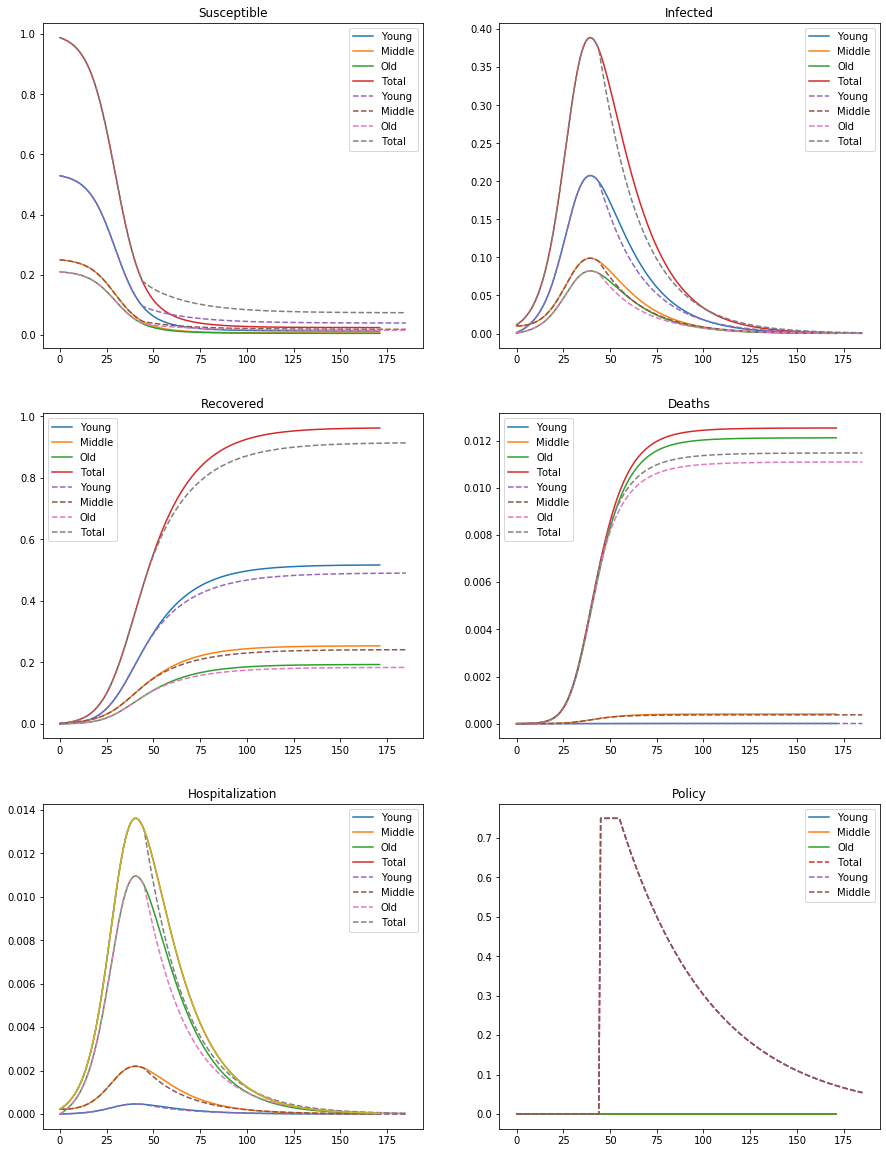

In [121]:
fig = plt.figure(figsize=(15, 12))
axs = fig.add_subplot(3, 2, 1)
adj = fig.subplots_adjust(bottom=-.4)
xr  = np.arange(len(res['S']['s1']))
ls1 = axs.plot(xr, res['S']['s1'])
ls2 = axs.plot(xr, res['S']['s2'])
ls3 = axs.plot(xr, res['S']['s3'])

stotal = [s1 + s2 + s3 for s1, s2, s3 in zip(res['S']['s1'] , res['S']['s2'], res['S']['s3'])]

lst = axs.plot(xr, stotal)

xrp  = np.arange(len(resp['S']['s1']))
ls1p = axs.plot(xrp, resp['S']['s1'], linestyle='--')
ls2p = axs.plot(xrp, resp['S']['s2'], linestyle='--')
ls3p = axs.plot(xrp, resp['S']['s3'], linestyle='--')

stotalp = [s1 + s2 + s3 for s1, s2, s3 in zip(resp['S']['s1'] , resp['S']['s2'], resp['S']['s3'])]

lstp = axs.plot(xrp, stotalp, linestyle='--')

sla = axs.legend(['Young', 'Middle', 'Old', 'Total', 'Young', 'Middle', 'Old', 'Total'])
stit = axs.title.set_text('Susceptible')

axi = fig.add_subplot(3, 2, 2)

xr  = np.arange(len(res['I']['i1']))
li1 = axi.plot(xr, res['I']['i1'])
li2 = axi.plot(xr, res['I']['i2'])
li3 = axi.plot(xr, res['I']['i3'])

itotal = [i1 + i2 + i3 for i1, i2, i3 in zip(res['I']['i1'] , res['I']['i2'], res['I']['i3'])]

lst = axi.plot(xr, itotal)

xrp  = np.arange(len(resp['I']['i1']))
li1p = axi.plot(xrp, resp['I']['i1'], linestyle='--')
li2p = axi.plot(xrp, resp['I']['i2'], linestyle='--')
li3p = axi.plot(xrp, resp['I']['i3'], linestyle='--')

itotalp = [i1 + i2 + i3 for i1, i2, i3 in zip(resp['I']['i1'] , resp['I']['i2'], resp['I']['i3'])]

lstp = axi.plot(xrp, itotalp, linestyle='--')

ila = axi.legend(['Young', 'Middle', 'Old', 'Total', 'Young', 'Middle', 'Old', 'Total'])
itit = axi.title.set_text('Infected')

axr = fig.add_subplot(3, 2, 3)

xr  = np.arange(len(res['R']['r1']))
lr1 = axr.plot(xr, res['R']['r1'])
lr2 = axr.plot(xr, res['R']['r2'])
lr3 = axr.plot(xr, res['R']['r3'])

rtotal = [r1 + r2 + r3 for r1, r2, r3 in zip(res['R']['r1'] , res['R']['r2'], res['R']['r3'])]

lst = axr.plot(xr, rtotal)

xrp  = np.arange(len(resp['R']['r1']))
lr1p = axr.plot(xrp, resp['R']['r1'], linestyle='--')
lr2p = axr.plot(xrp, resp['R']['r2'], linestyle='--')
lr3p = axr.plot(xrp, resp['R']['r3'], linestyle='--')

rtotalp = [r1 + r2 + r3 for r1, r2, r3 in zip(resp['R']['r1'] , resp['R']['r2'], resp['R']['r3'])]

lst = axr.plot(xrp, rtotalp, linestyle='--')

rla = axr.legend(['Young', 'Middle', 'Old', 'Total', 'Young', 'Middle', 'Old', 'Total'])
rtit = axr.title.set_text('Recovered')

axd = fig.add_subplot(3, 2, 4)

xr  = np.arange(len(res['D']['d1']))
ld1 = axd.plot(xr, res['D']['d1'])
ld2 = axd.plot(xr, res['D']['d2'])
ld3 = axd.plot(xr, res['D']['d3'])

dtotal = [d1 + d2 + d3 for d1, d2, d3 in zip(res['D']['d1'] , res['D']['d2'], res['D']['d3'])]

lst = axd.plot(xr, dtotal)

xrp  = np.arange(len(resp['D']['d1']))
ld1p = axd.plot(xrp, resp['D']['d1'], linestyle='--')
ld2p = axd.plot(xrp, resp['D']['d2'], linestyle='--')
ld3p = axd.plot(xrp, resp['D']['d3'], linestyle='--')

dtotalp = [d1 + d2 + d3 for d1, d2, d3 in zip(resp['D']['d1'] , resp['D']['d2'], resp['D']['d3'])]

lst = axd.plot(xrp, dtotalp, linestyle='--')

rla = axd.legend(['Young', 'Middle', 'Old', 'Total', 'Young', 'Middle', 'Old', 'Total'])
rtit = axd.title.set_text('Deaths')

axh = fig.add_subplot(3, 2, 5)

xr  = np.arange(len(res['H']['h1']))
ld1 = axh.plot(xr, res['H']['h1'])
ld2 = axh.plot(xr, res['H']['h2'])
ld3 = axh.plot(xr, res['H']['h3'])

htotal = [h1 + h2 + h3 for h1, h2, h3 in zip(res['H']['h1'] , res['H']['h2'], res['H']['h3'])]

lst = axh.plot(xr, htotal)

xrp  = np.arange(len(resp['H']['h1']))
ld1p = axh.plot(xrp, resp['H']['h1'], linestyle='--')
ld2p = axh.plot(xrp, resp['H']['h2'], linestyle='--')
ld3p = axh.plot(xrp, resp['H']['h3'], linestyle='--')

htotalp = [h1 + h2 + h3 for h1, h2, h3 in zip(resp['H']['h1'] , resp['H']['h2'], resp['H']['h3'])]

lst = axh.plot(xrp, htotalp, linestyle='--')

rla = axh.legend(['Young', 'Middle', 'Old', 'Total', 'Young', 'Middle', 'Old', 'Total'])

rtit = axh.title.set_text('Hospitalization')

axpol = fig.add_subplot(3, 2, 6)

xr  = np.arange(len(res['L']['l1']))
ld1 = axpol.plot(xr, res['L']['l1'])
ld2 = axpol.plot(xr, res['L']['l2'])
ld3 = axpol.plot(xr, res['L']['l3'])

lst = axh.plot(xr, htotal)

xrp  = np.arange(len(resp['L']['l1']))
ld1p = axpol.plot(xrp, resp['L']['l1'], linestyle='--')
ld2p = axpol.plot(xrp, resp['L']['l2'], linestyle='--')
ld3p = axpol.plot(xrp, resp['L']['l3'], linestyle='--')

polla = axpol.legend(['Young', 'Middle', 'Old', 'Total', 'Young', 'Middle', 'Old', 'Total'])

poltit = axpol.title.set_text('Policy')

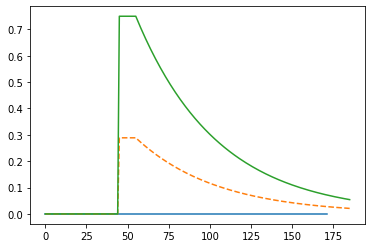

In [123]:
plt.plot(res['U']['ut'])
plt.plot(resp['U']['ut'], linestyle='dashed')
plt.plot(resp['L']['l1'])

What are some sensible aggregate measures? Well, one should be deaths. This is really all we need as it has hospital capacity baked in. But, we might take the following four aggregate measures: 

- length in days.
- total unemployment days
- deaths
- peak hospital cases

In [30]:
def display_aggs(results):
    print('Unemployment days lost:  ', results['Aggs']['agg_u']) 
    print('Total deaths:            ', results['Aggs']['agg_d'])
    print('Total epidemic days:     ', results['Aggs']['days'])
    print('Total recovered:         ', results['Aggs']['agg_r'])
    print('Maximum infection at ', results['Aggs']['maxinfd'], ' with value ',  results['Aggs']['maxinf'])
    print('Maximum hospitalizations at ', results['Aggs']['maxhosd'], ' with value ', results['Aggs']['maxhos'])

In [31]:
display_aggs(res)

Unemployment days lost:   0.0
Total deaths:             0.012534303172226759
Total epidemic days:      172
Total recovered:          0.962151619701018
Maximum infection at  39  with value  0.3887596156238392
Maximum hospitalizations at  40  with value  0.013611722919678536


In [32]:
display_aggs(resp)

Unemployment days lost:   16.3865218769169
Total deaths:             0.001750212226153658
Total epidemic days:      535
Total recovered:          0.5465397663353441
Maximum infection at  253  with value  0.049487209190182804
Maximum hospitalizations at  254  with value  0.0017344815970896461


In [72]:
def compare_aggs(res1, res2):
    cats = 0
    for item in ['agg_u', 'agg_d', 'days']:
        if res1['Aggs'][item] <= res2['Aggs'][item]:
            cats += 1
    for item in ['agg_r']:
        if res1['Aggs'][item] >= res2['Aggs'][item]:
            cats += 1
    return cats, 4 - cats   

In [130]:
reshat = achewwmodel(maxlock=40, taper=[.02, .02, .02], L=[.5, .5, .5], kappa=[.7, .7, .7], epsilon=[.2, .2, .2])
res    = achewwmodel(maxlock=40, taper=[.02, .02, .02], L=[.5, .5, .5], kappa=[.7, .7, .7])

In [131]:
display_aggs(reshat)

Unemployment days lost:   11.381296474222744
Total deaths:             0.008127264931315296
Total epidemic days:      230
Total recovered:          0.9271246271729899
Maximum infection at  78  with value  0.24095070961028686
Maximum hospitalizations at  79  with value  0.008443502764935891


In [132]:
display_aggs(res)

Unemployment days lost:   14.226620592778428
Total deaths:             0.008127264931315296
Total epidemic days:      230
Total recovered:          0.9271246271729899
Maximum infection at  78  with value  0.24095070961028686
Maximum hospitalizations at  79  with value  0.008443502764935891
